In [5]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="langchain_core")
import random

In [ ]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int

def setup_node(state: AgentState) -> AgentState:
    state["player_name"] = f"Hello, {state["player_name"]}"
    state["attempts"] = 0 
    return state
def guess_node(state: AgentState) -> AgentState:
    """Generate random number from 1 to 20"""
    state["guesses"].append(random.randint(state["lower_bound"], state["upper_bound"]))
    state["attempts"] += 1
   
    return state
def should_continue(state: AgentState) -> str:
    
    if state["attempts"]  < 7:
        print(f"Enter the {state['attempts']}")
        return "loop"
    return "exit"

In [39]:
graph = StateGraph(AgentState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_conditional_edges(
    "guess", should_continue,
    {
        "loop": "guess",
        "exit": END
    }
)
app = graph.compile()


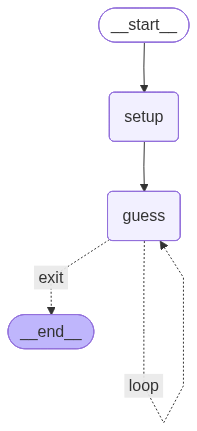

In [40]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [41]:
initial_state = {
    "player_name": "Student",
    "attempts": 0,
    "guesses": [],
    "lower_bound": 1,
    "upper_bound": 20
}
updated_state = app.invoke(initial_state)

Enter the 1
Enter the 2
Enter the 3
Enter the 4
Enter the 5
Enter the 6
